In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Datos
# ==============================================================================
area = [76, 92, 107, 42, 65, 150, 65, 105, 40, 55]

valor = [200, 320, 300, 160, 190, 315, 230, 380, 155, 175]

datos = pd.DataFrame({'area': area, 'valor': valor})
datos.head(10)

,area,valor
0,76,200
1,92,320
2,107,300
3,42,160
4,65,190
5,150,315
6,65,230
7,105,380
8,40,155
9,55,175


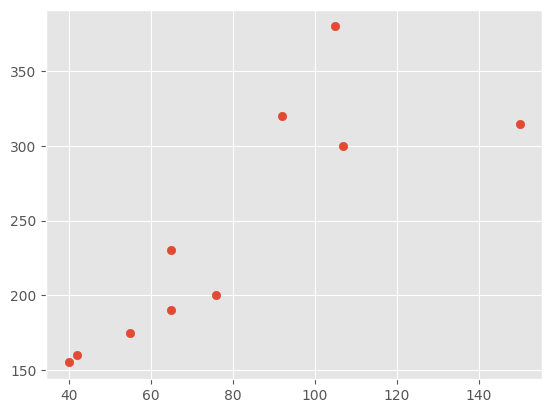

In [5]:
#Graficar los nodos dados (ubicaciones)
area= datos['area']
valor = datos['valor']

X = []
for i in range(len(datos['area'])):
    X.append(area[i])
    X.append(valor[i])

X = np.array(X)

X = X.reshape(-1, 2,)


plt.scatter(area, valor)
plt.show()

In [6]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['area'], y =  datos['valor'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8335962316859814
P-value:  0.002730015790958402


In [7]:
datos = pd.DataFrame({'Area': area, 'Valor': valor})

In [8]:
X = datos[['Area']]
y = datos['Valor']

regression = LinearRegression()
regression.fit(X, y)

coeficiente_de_relacion = regression.coef_[0]
print("Coeficiente de relación:", coeficiente_de_relacion)

Coeficiente de relación: 1.9428698929937998


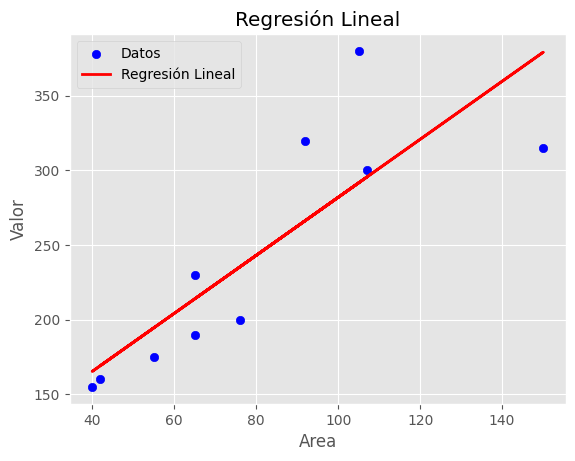

In [9]:
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, regression.predict(X), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Area')
plt.ylabel('Valor')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

In [16]:
def linea_menos_cuadrados(x, y):
  n = len(x)
  if n != len(y):
    raise ValueError("Los arrays x e y deben tener la misma longitud.")

  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_xy = np.sum(x * y)
  sum_x_squared = np.sum(x ** 2)

  m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
  b = (sum_y - m * sum_x) / n

  return m, b


m, b = linea_menos_cuadrados(datos.Area, datos.Valor)
print(f"La ecuación de la recta es: y = {m:.2f}x + {b:.2f}")

La ecuación de la recta es: y = 1.94x + 87.65
